# Sentinel 2

In this notebook we load all available bands from Sentinel-2 and compare the images before/after the July 2022 fires near La Teste.

The near-infrared bands exhibit the largest difference in burned areas (healthy vegetation is brighter in NIR).

Documentation on `load_collection` method: https://open-eo.github.io/openeo-python-client/data_access.html

In [46]:
import openeo
import xarray
import matplotlib.pyplot as plt

connection = openeo.connect(url="openeo.dataspace.copernicus.eu")
connection.authenticate_oidc()

s2_cube = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=("2022-07-12", "2022-07-18"),
    spatial_extent={
        "west": -1.23,
        "south": 44.51,
        "east": -1.12,
        "north": 44.59,
        "crs": "EPSG:4326",
    },
)

s2_cube.download("fire_la_teste_all_bands.nc")

Authenticated using refresh token.


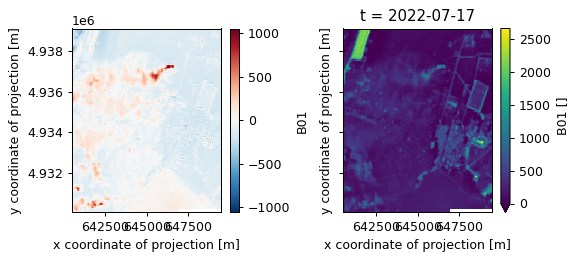

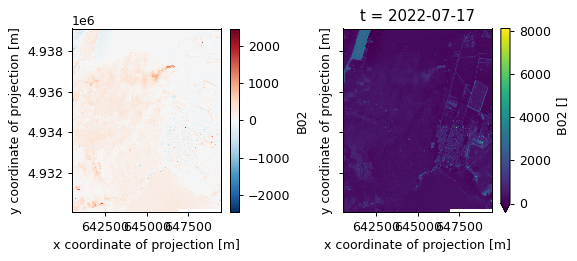

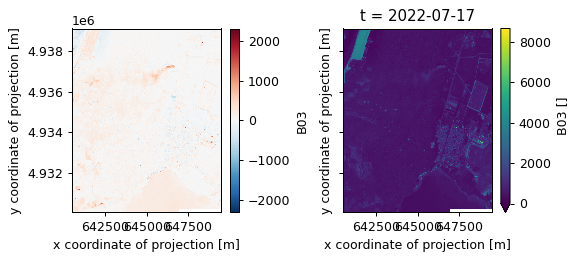

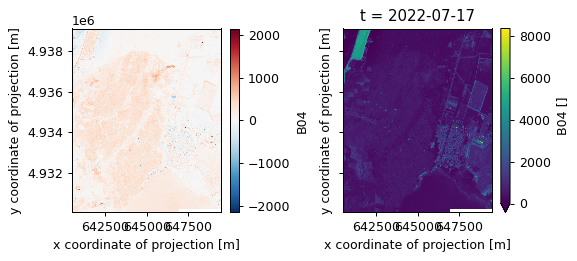

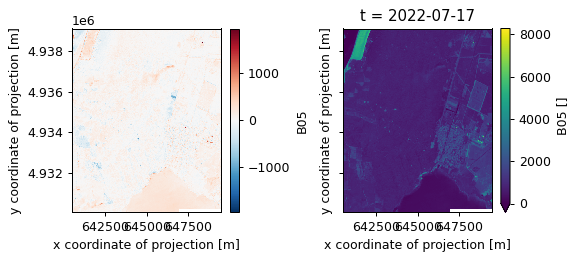

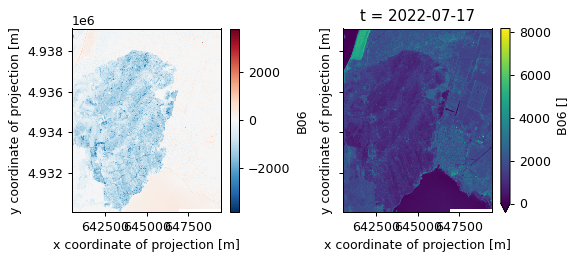

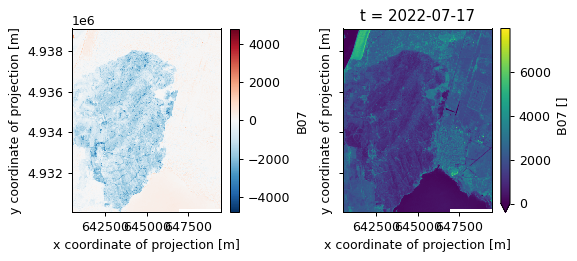

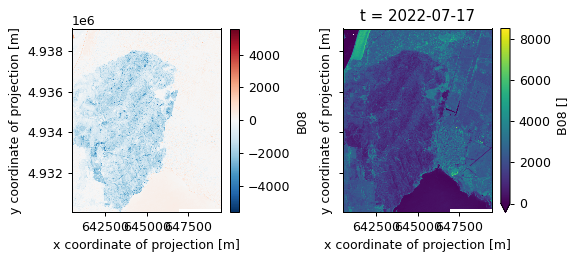

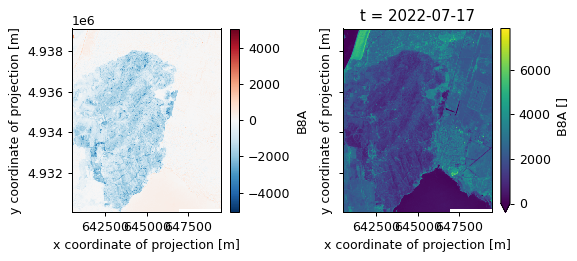

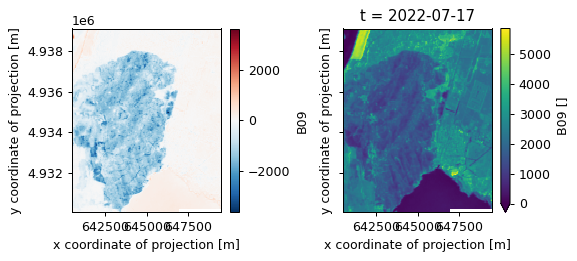

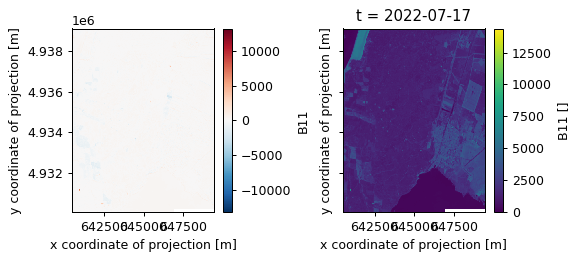

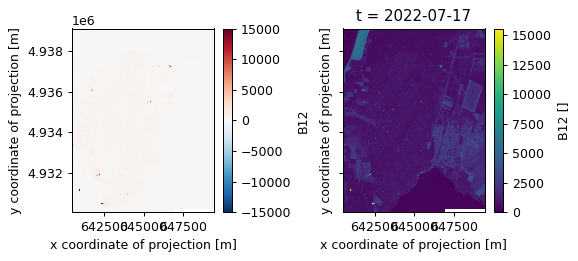

In [51]:
ds = xarray.load_dataset("fire_la_teste_all_bands.nc")

for channel in ds.data_vars:
    if channel.startswith('B'):
        # Convert xarray DataSet to a (bands, t, x, y) DataArray
        data = ds[channel]

        before = data[{"t": 0}]
        after = data[{"t": 1}]
        diff = after-before
        
        fig, axes = plt.subplots(ncols=2, figsize=(6.5, 3), dpi=90, sharey=True)
        diff.plot.imshow(ax=axes[0])
        data[{"t": 1}].plot.imshow(ax=axes[1],vmin=0)
        plt.tight_layout();

In [5]:
ds

<xarray.Dataset> Size: 186MB
Dimensions:           (t: 3, x: 895, y: 909)
Coordinates:
  * t                 (t) datetime64[ns] 24B 2022-07-07 2022-07-12 2022-07-17
  * x                 (x) float64 7kB 6.405e+05 6.405e+05 ... 6.494e+05
  * y                 (y) float64 7kB 4.939e+06 4.939e+06 ... 4.93e+06 4.93e+06
Data variables: (12/20)
    crs               |S1 1B b''
    B01               (t, y, x) float32 10MB 726.0 580.0 580.0 ... nan nan nan
    B02               (t, y, x) float32 10MB 720.0 712.0 690.0 ... nan nan nan
    B03               (t, y, x) float32 10MB 804.0 792.0 778.0 ... nan nan nan
    B04               (t, y, x) float32 10MB 528.0 515.0 503.0 ... nan nan nan
    B05               (t, y, x) float32 10MB 499.0 494.0 494.0 ... nan nan nan
    ...                ...
    AOT               (t, y, x) float32 10MB 126.0 126.0 126.0 ... nan nan nan
    SCL               (t, y, x) float32 10MB 6.0 6.0 6.0 6.0 ... nan nan nan nan
    sunAzimuthAngles  (t, y, x) float32 10MB 145.8 145.8 145.8 ... nan nan nan
    sunZenithAngles   (t, y, x) float32 10MB 25.31 25.31 25.31 ... nan nan nan
    viewAzimuthMean   (t, y, x) float32 10MB 194.8 194.8 194.8 ... nan nan nan
    viewZenithMean    (t, y, x) float32 10MB 2.808 2.808 2.808 ... nan nan nan
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

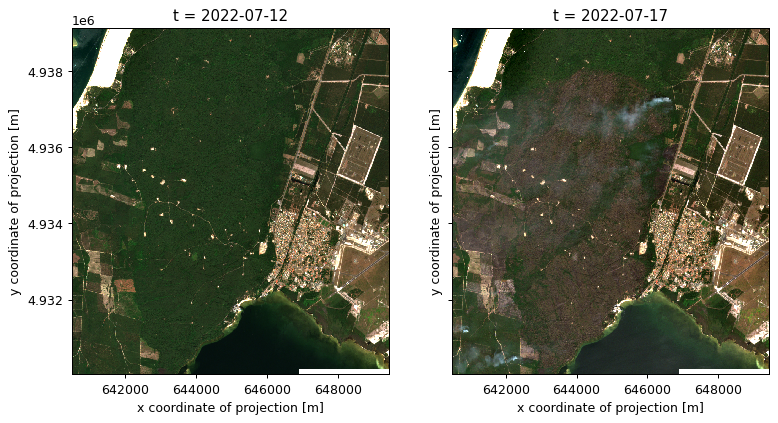

In [49]:
ds = xarray.load_dataset("fire_la_teste_all_bands.nc")
# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["B04", "B03", "B02"]].to_array(dim="bands")

fig, axes = plt.subplots(ncols=2, figsize=(10, 5), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(ax=axes[0],vmin=0,vmax=2000)
data[{"t": 1}].plot.imshow(ax=axes[1],vmin=0,vmax=2000);

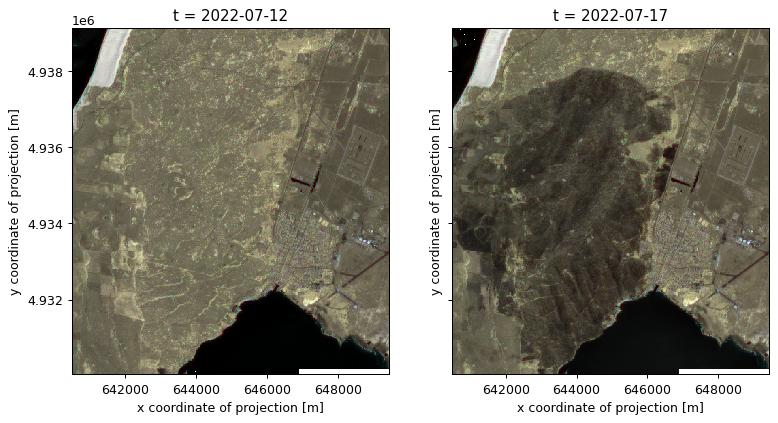

In [63]:
ds = xarray.load_dataset("fire_la_teste_all_bands.nc")
# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["B09", "B08", "B06"]].to_array(dim="bands")

fig, axes = plt.subplots(ncols=2, figsize=(10, 5), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(ax=axes[0],vmin=0,vmax=6000)
data[{"t": 1}].plot.imshow(ax=axes[1],vmin=0,vmax=6000);